In [1]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("Annamaya nagar_Tirupati_data.csv")

# Display the first few rows and info about the dataset
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample_ID                30 non-null     int64  
 1   Date                     30 non-null     object 
 2   Station                  30 non-null     object 
 3   pH                       30 non-null     float64
 4   EC (µS/cm)               30 non-null     float64
 5   TDS (mg/L)               30 non-null     float64
 6   Hardness (mg/L)          30 non-null     float64
 7   Bacteria Count (CFU/mL)  30 non-null     int64  
 8   Pesticide Level (µg/L)   30 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 2.2+ KB


(   Sample_ID        Date     Station    pH  EC (µS/cm)  TDS (mg/L)  \
 0          5  2025-05-25  Korlagunta  7.90      479.71      484.25   
 1         10  2025-05-26  Korlagunta  7.26      813.40      488.54   
 2         15  2025-05-27  Korlagunta  7.82      873.80      726.69   
 3         20  2025-05-28  Korlagunta  6.95      710.88      291.99   
 4         25  2025-05-29  Korlagunta  7.22      556.36      173.98   
 
    Hardness (mg/L)  Bacteria Count (CFU/mL)  Pesticide Level (µg/L)  
 0           327.72                      130                   0.688  
 1           438.35                       81                   0.432  
 2           291.66                      100                   0.777  
 3           274.95                       74                   0.259  
 4           332.87                      129                   0.329  ,
 None)

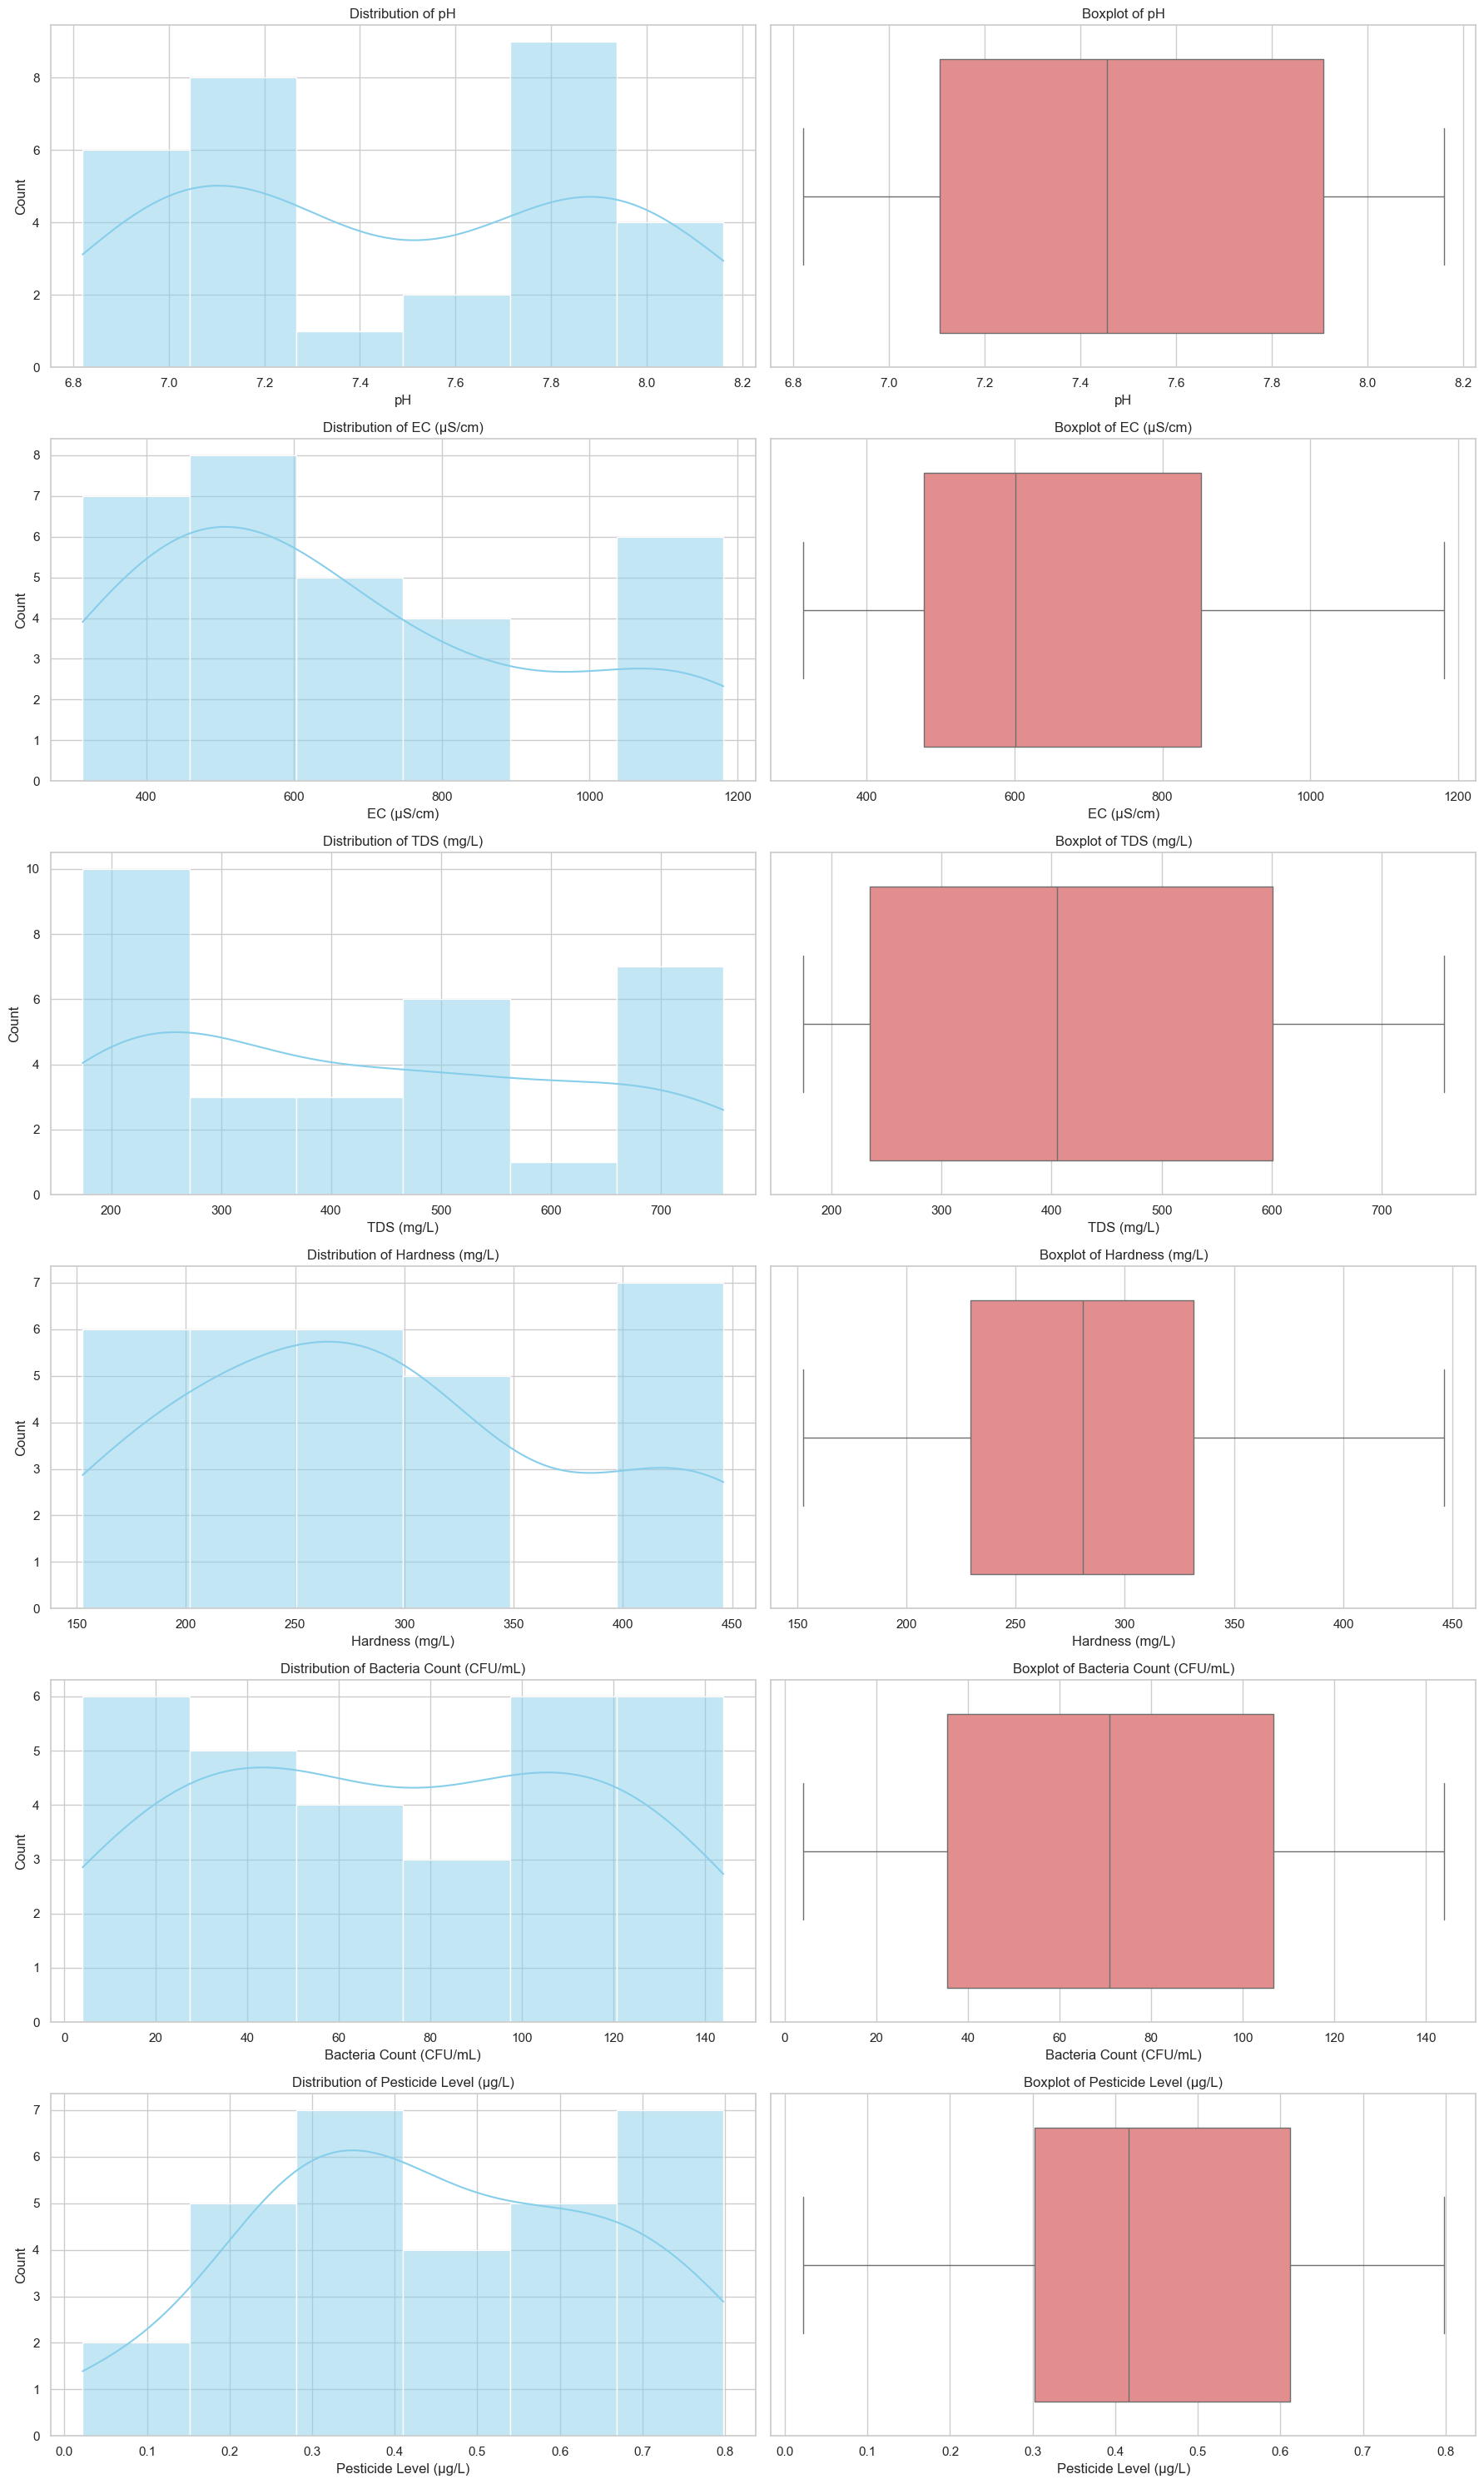

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Define columns of interest
columns_of_interest = ['pH', 'EC (µS/cm)', 'TDS (mg/L)', 'Hardness (mg/L)', 
                       'Bacteria Count (CFU/mL)', 'Pesticide Level (µg/L)']

# Plot distribution and boxplot for each factor
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(18, 30))
for i, col in enumerate(columns_of_interest):
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Distribution of {col}")
    
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


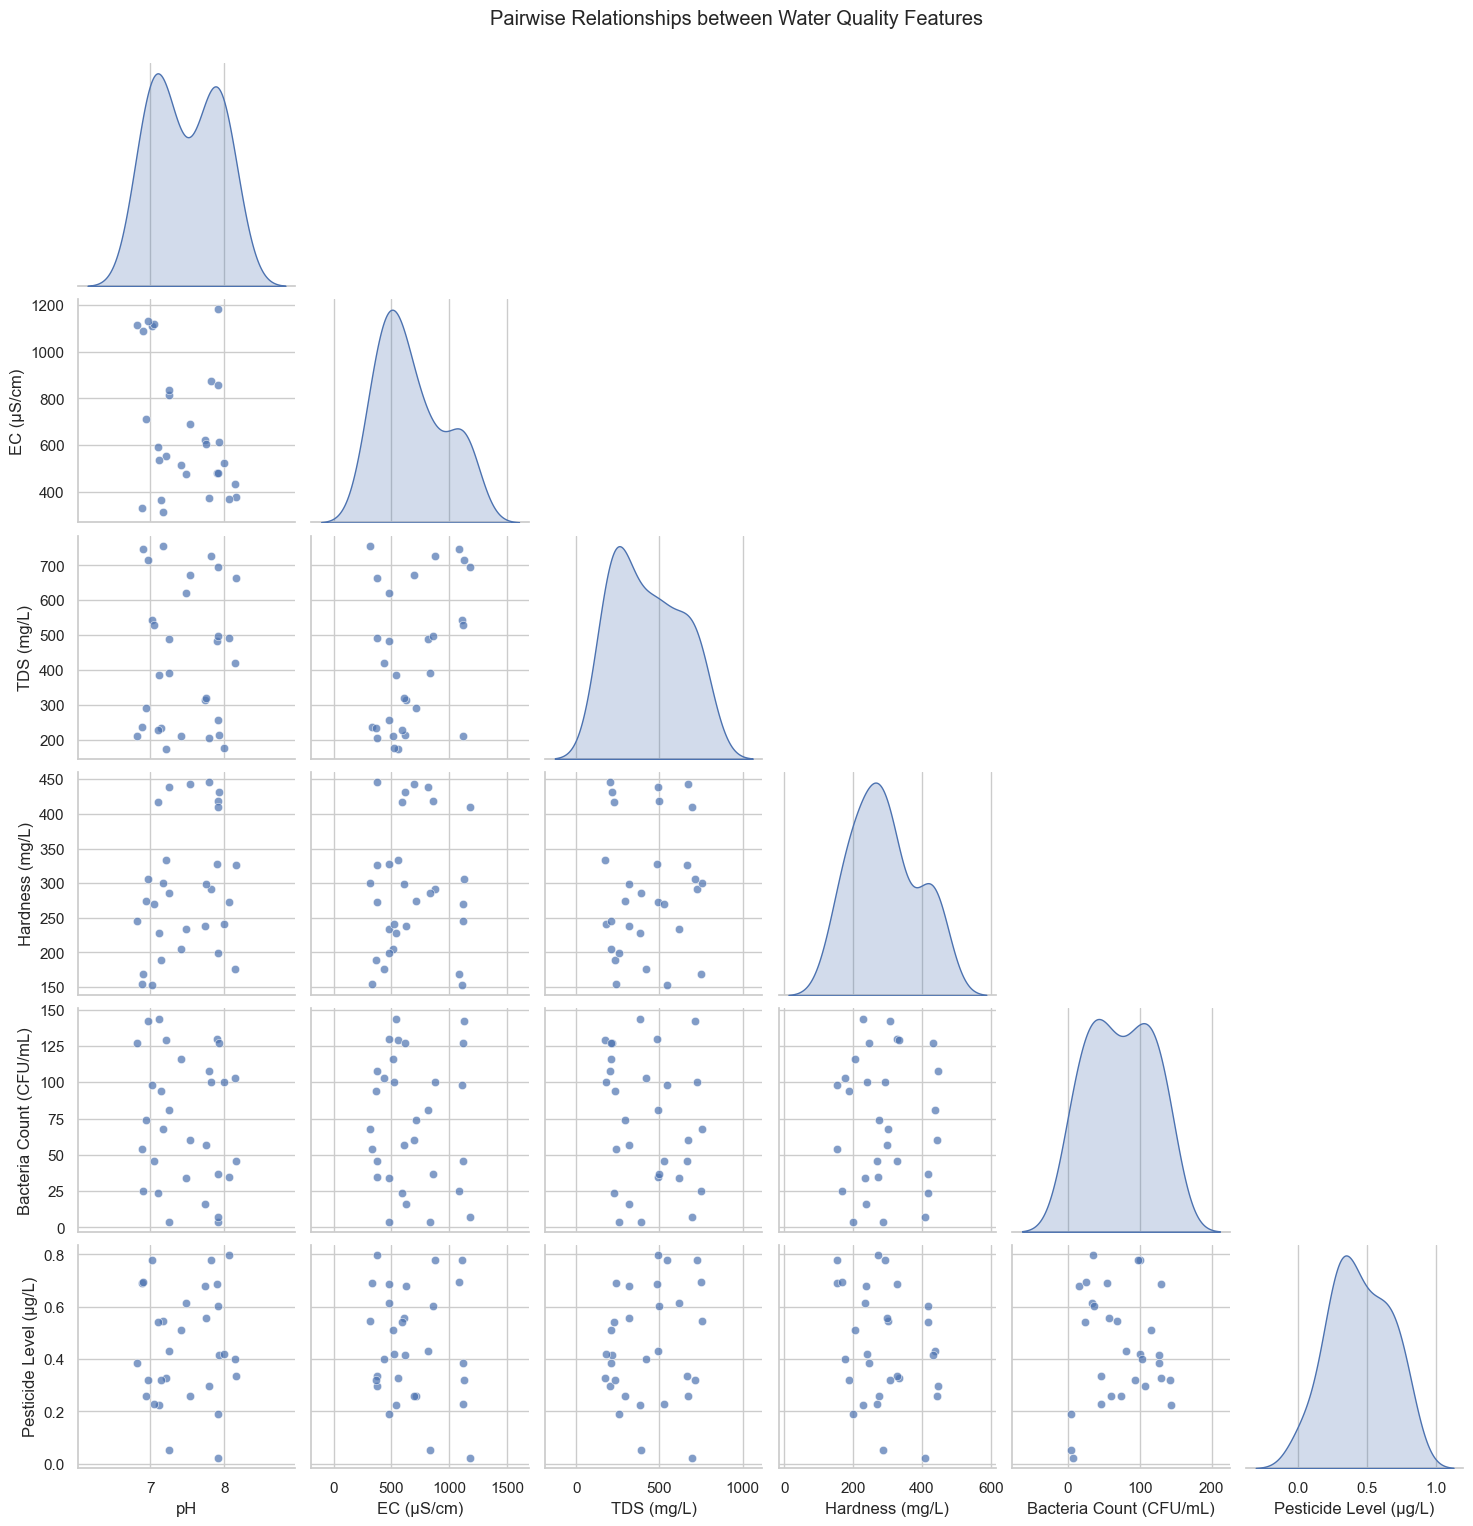

In [3]:
# Pairplot to explore relationships between features
sns.pairplot(df[columns_of_interest], corner=True, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise Relationships between Water Quality Features", y=1.02)
plt.show()


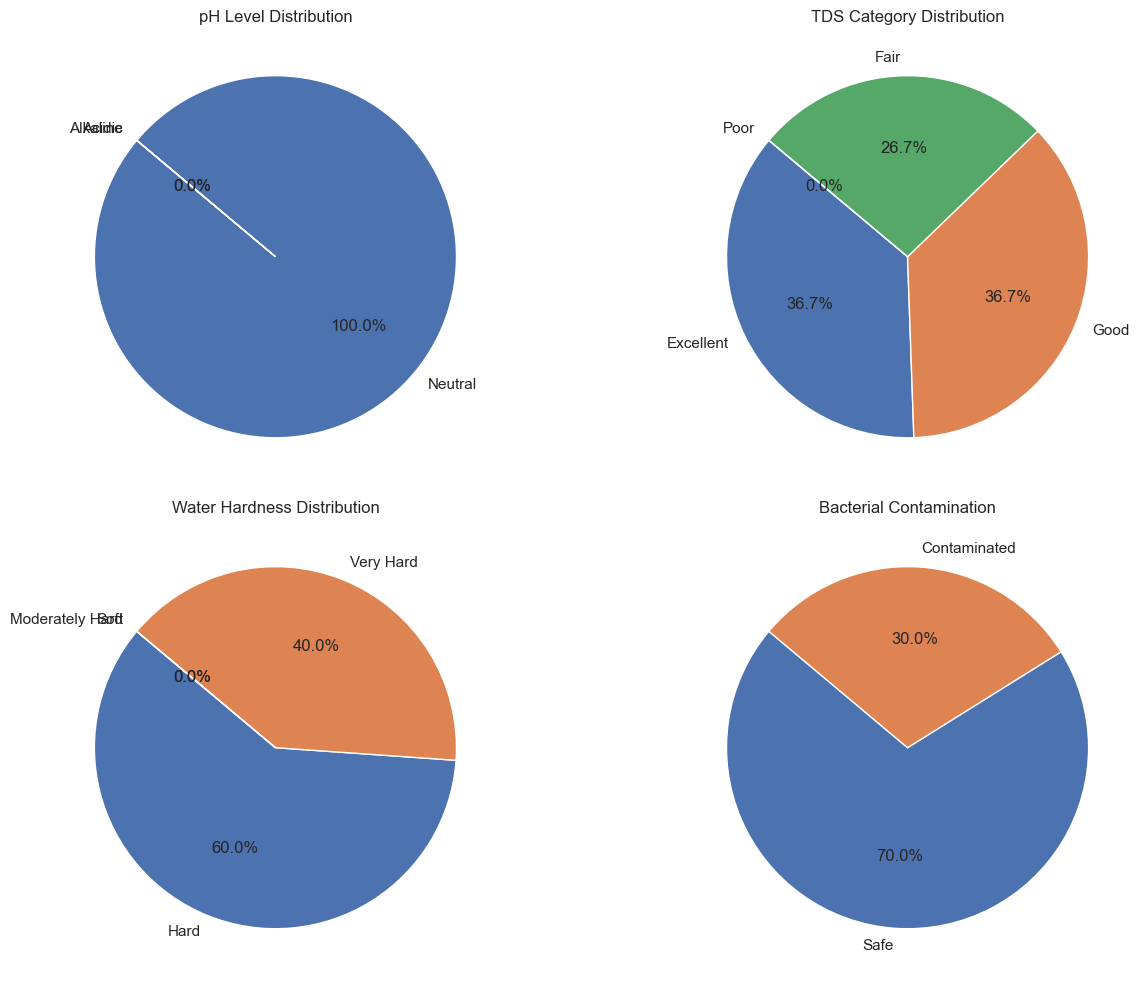

In [4]:
import matplotlib.pyplot as plt

# Classify pH levels
df['pH_Category'] = pd.cut(df['pH'], bins=[0, 6.5, 8.5, 14], labels=['Acidic', 'Neutral', 'Alkaline'])
ph_counts = df['pH_Category'].value_counts()

# Classify TDS levels
df['TDS_Category'] = pd.cut(df['TDS (mg/L)'], bins=[0, 300, 600, 900, float('inf')], 
                            labels=['Excellent', 'Good', 'Fair', 'Poor'])
tds_counts = df['TDS_Category'].value_counts()

# Classify Hardness
df['Hardness_Category'] = pd.cut(df['Hardness (mg/L)'], bins=[0, 75, 150, 300, float('inf')], 
                                 labels=['Soft', 'Moderately Hard', 'Hard', 'Very Hard'])
hardness_counts = df['Hardness_Category'].value_counts()

# Classify Bacteria
df['Bacteria_Category'] = df['Bacteria Count (CFU/mL)'].apply(lambda x: 'Safe' if x <= 100 else 'Contaminated')
bacteria_counts = df['Bacteria_Category'].value_counts()

# Plotting all pie charts
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].pie(ph_counts, labels=ph_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('pH Level Distribution')

axs[0, 1].pie(tds_counts, labels=tds_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('TDS Category Distribution')

axs[1, 0].pie(hardness_counts, labels=hardness_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Water Hardness Distribution')

axs[1, 1].pie(bacteria_counts, labels=bacteria_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Bacterial Contamination')

plt.tight_layout()
plt.show()
